Processed data for sub-1 - baseline


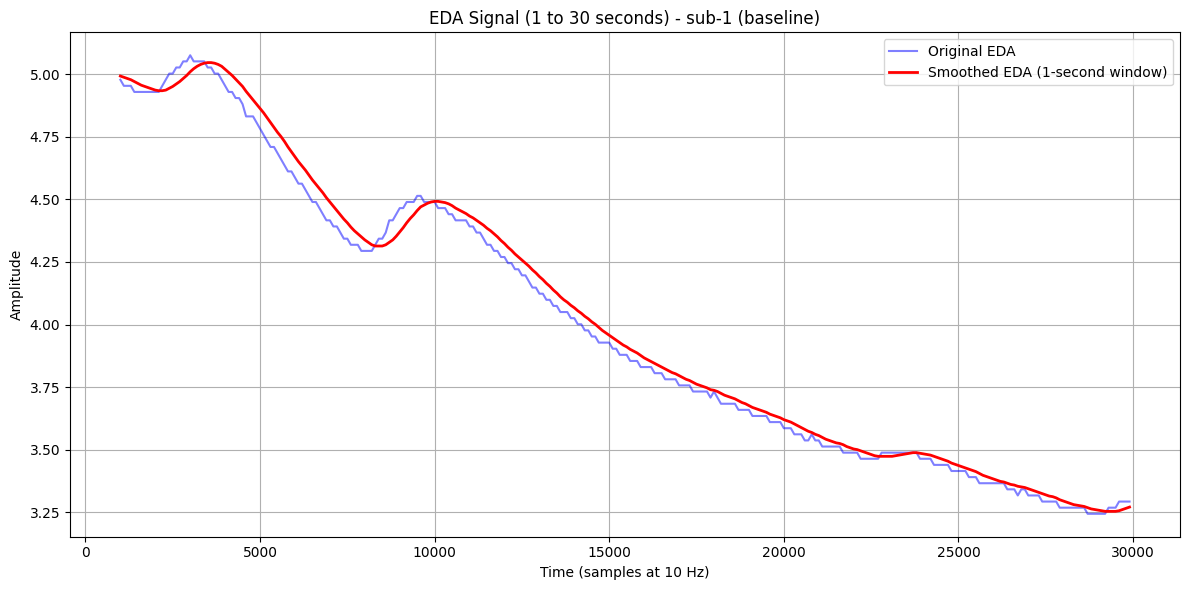

Processed data for sub-1 - spiderhand


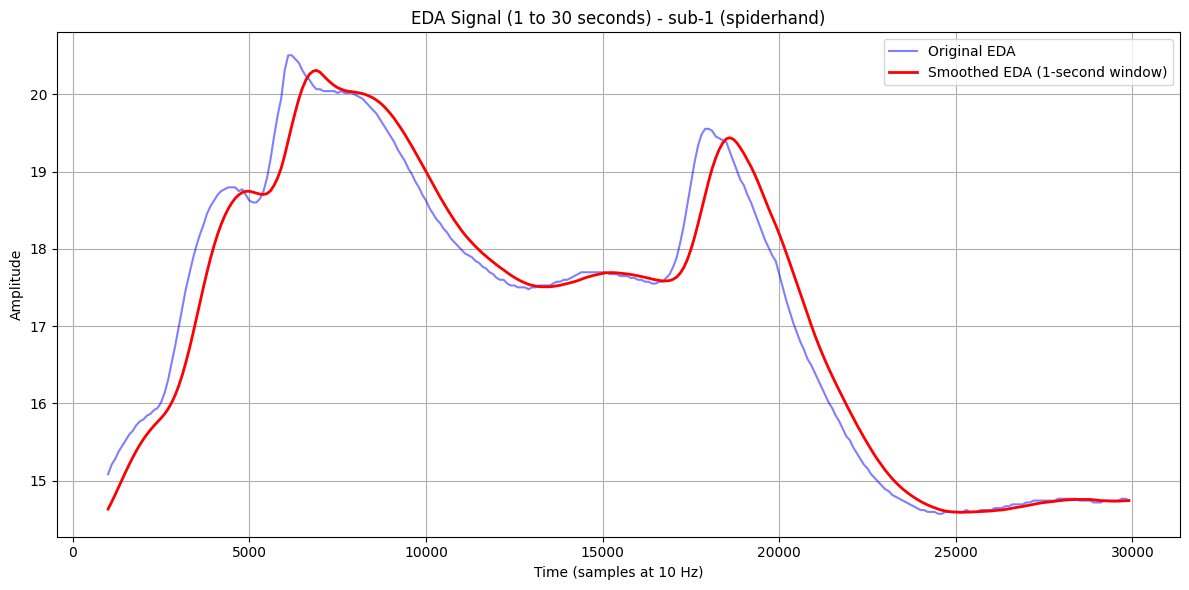

Processed data for sub-1 - spidervideo


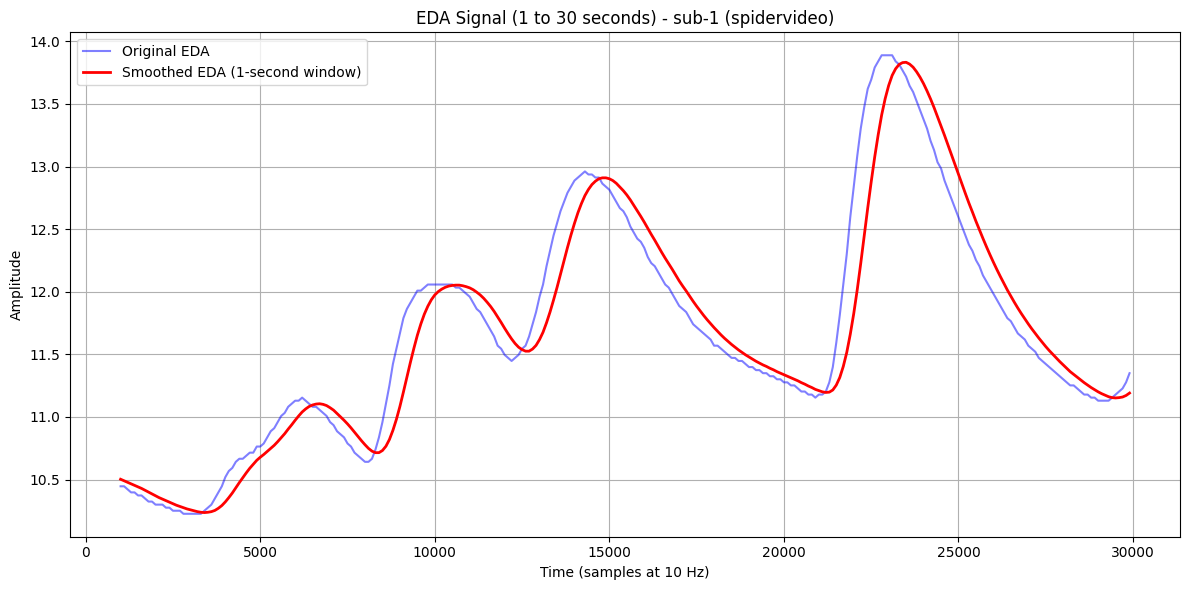

Processed data for sub-2 - baseline


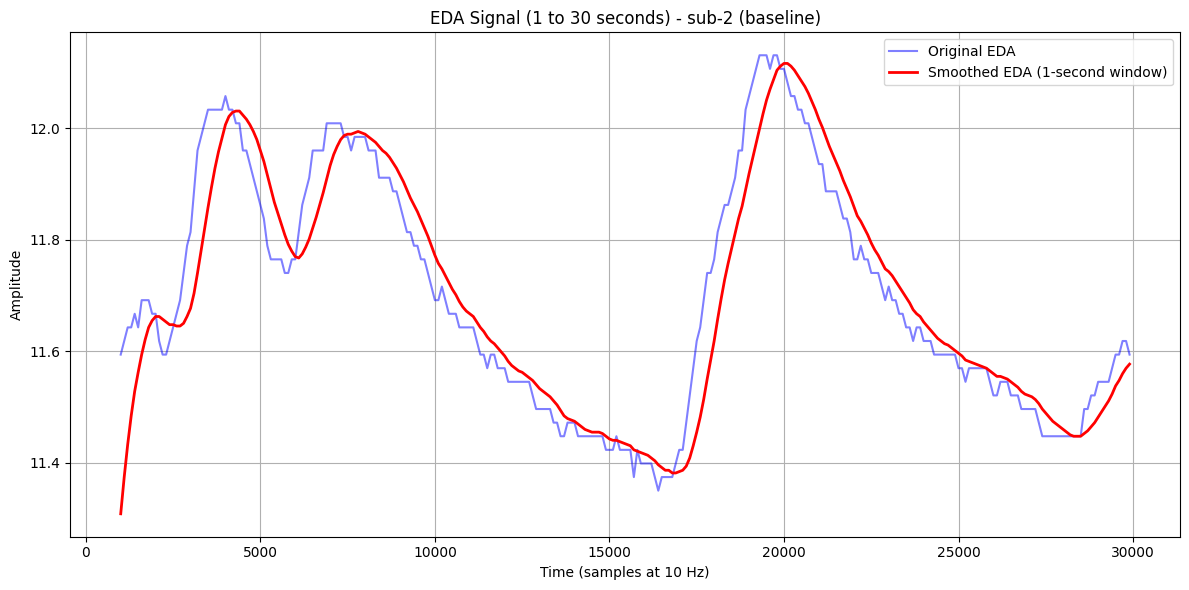

Processed data for sub-2 - spiderhand


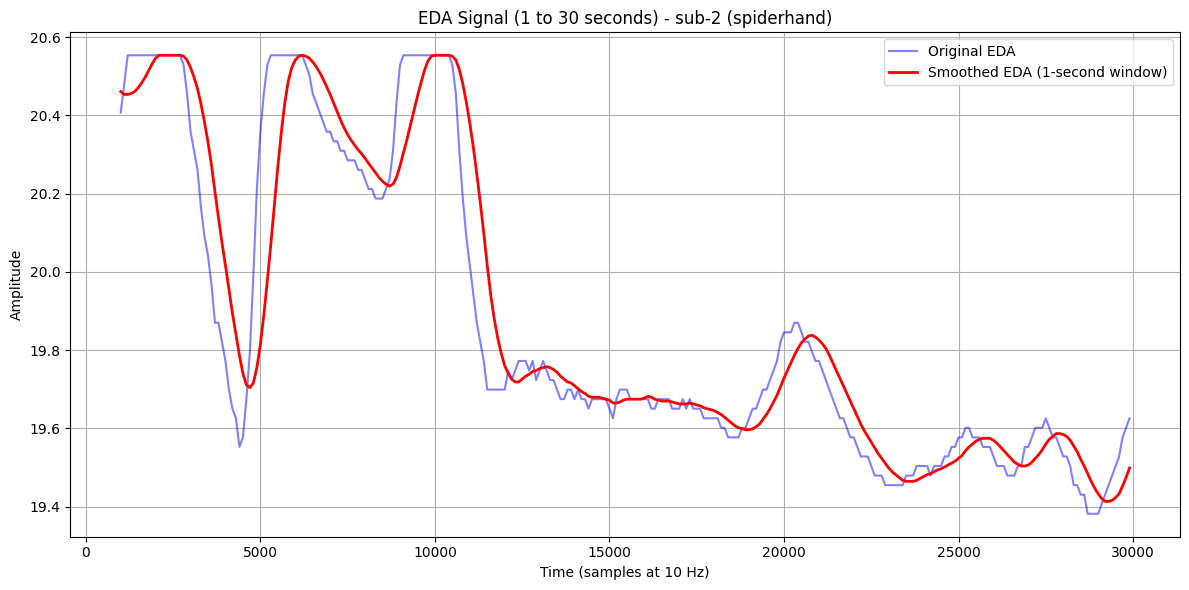

Processed data for sub-2 - spidervideo


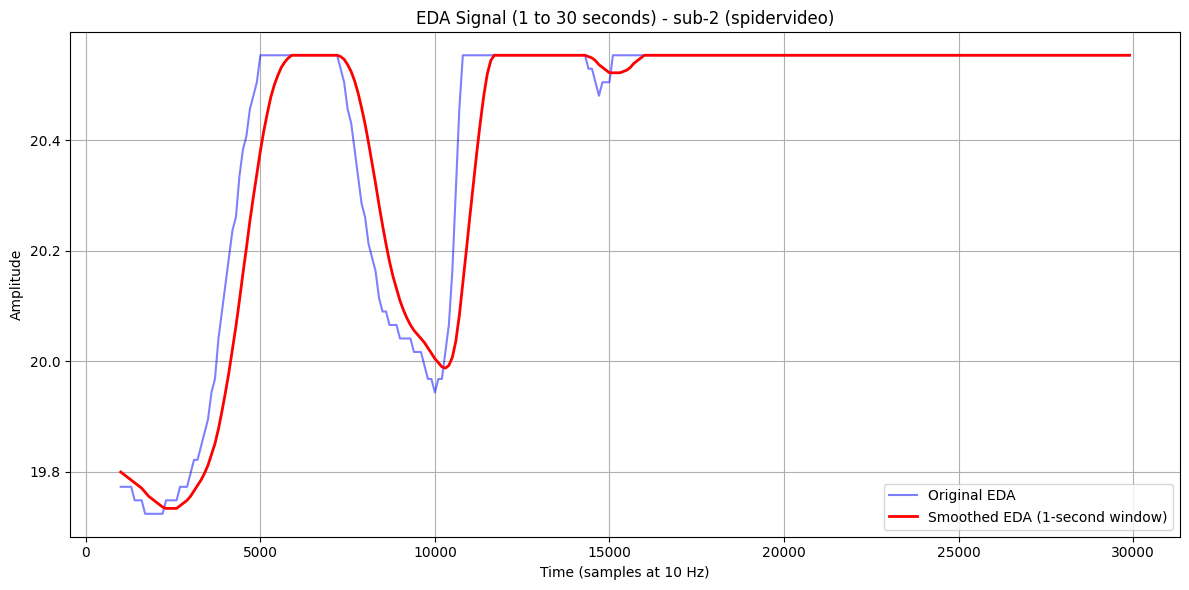

Processed data for sub-3 - baseline


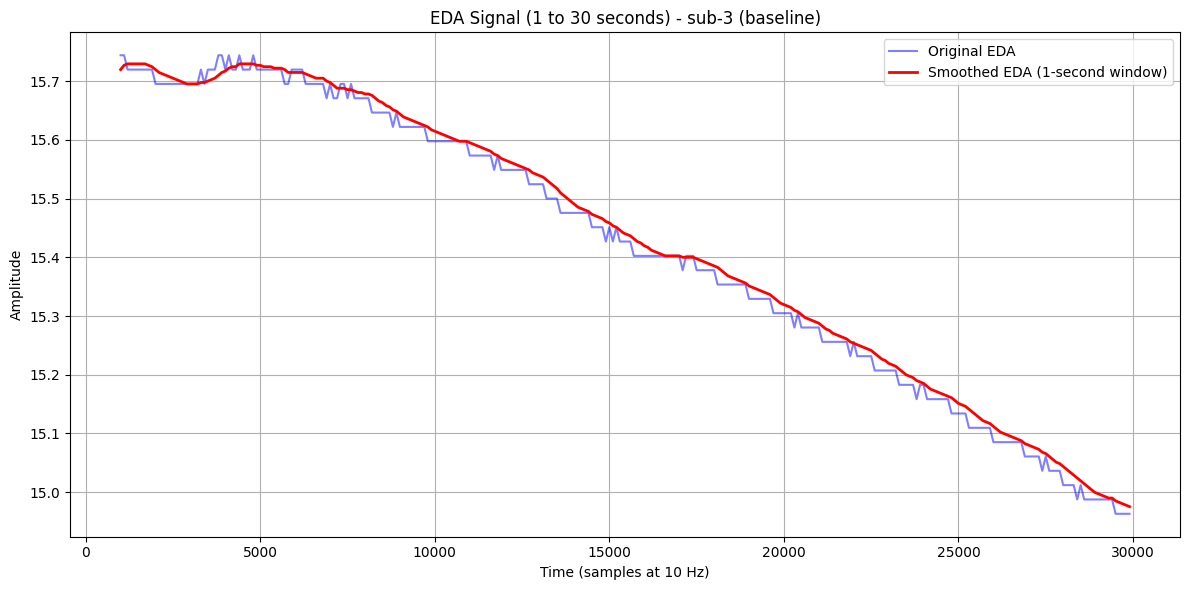

Processed data for sub-3 - spiderhand


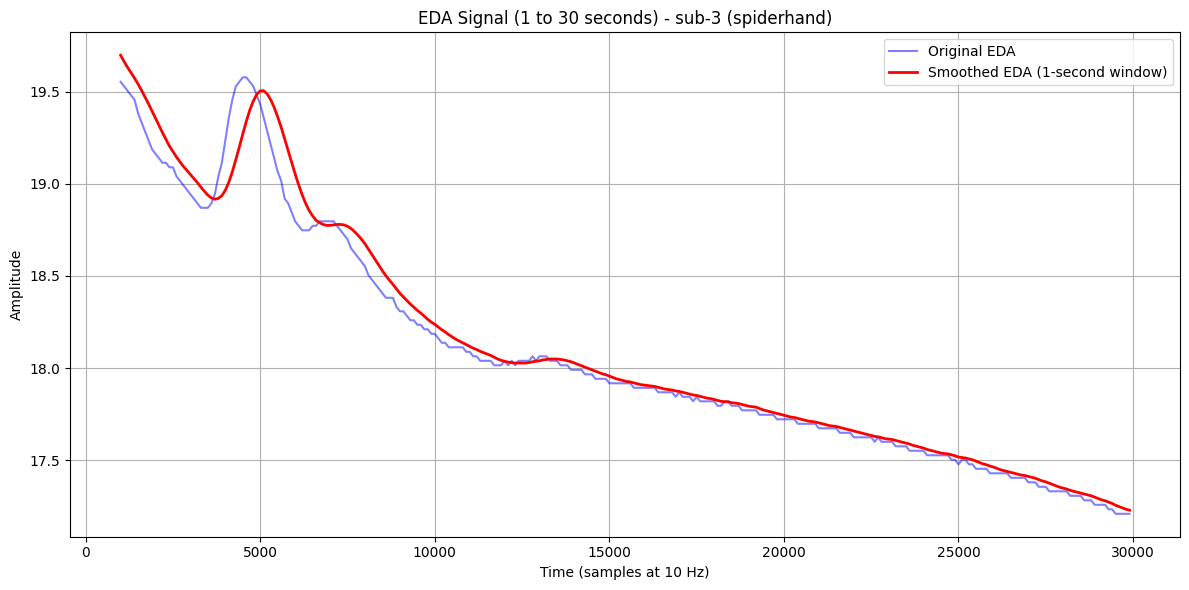

Processed data for sub-3 - spidervideo


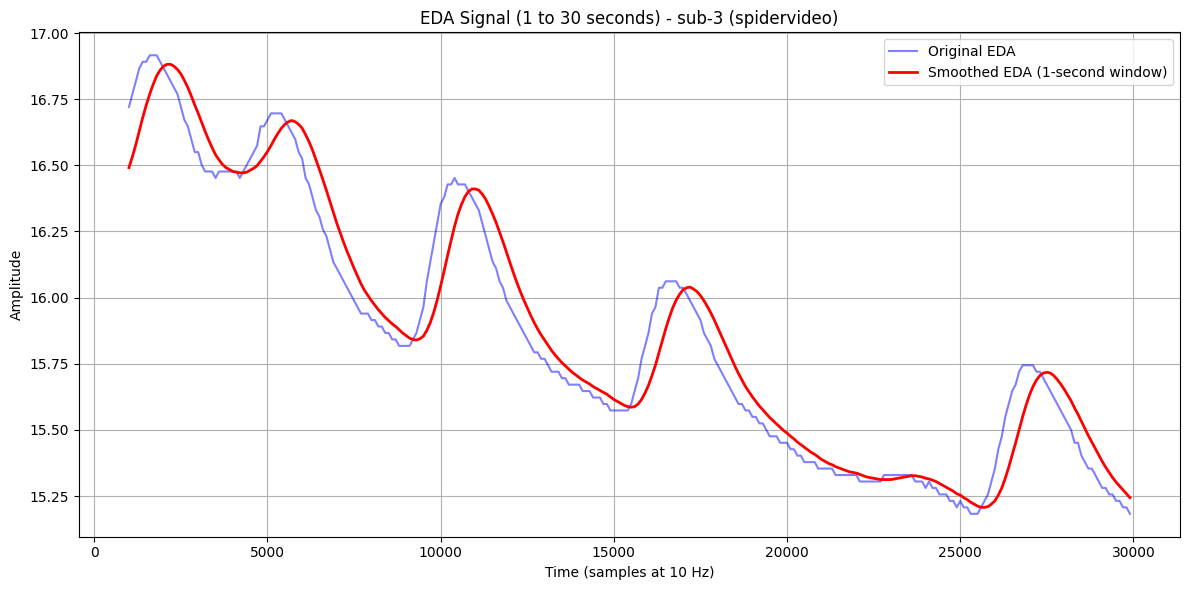

Preprocessed EDA data saved to /Users/erwin/Documents/ProjectPsychophysiologyData/preprocessed-data/preprocessed_eda.pkl


In [1]:
# Import necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# ## File path to raw data folder
raw_data_folder = '/Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/'

# ## Parameters: predefined participants and tasks
participants = ['sub-1', 'sub-2', 'sub-3']
tasks = ['baseline', 'spiderhand', 'spidervideo']

# ## Preprocessing parameters
downsample_factor = 100  # From 1000 Hz to 10 Hz
window_size = 10  # 1-second window for smoothing
sampling_rate = 10  # New sampling rate after downsampling (Hz)

# ## Container for all data
alldata = []

# ## Iterate through predefined participants and tasks
for pi in participants:
    for ti in tasks:
        # Assemble file name
        filename = os.path.join(raw_data_folder, f"{pi}_{ti}_eda.csv")
        
        try:
            # Read the data
            eda_data = pd.read_csv(filename)
            
            # Downsample the data
            eda_data_downsampled = eda_data.iloc[::downsample_factor]
            eda_data_downsampled.columns = ['EDA']  # Ensure proper column naming
            
            # Apply moving average for smoothing
            eda_data_movav = eda_data_downsampled['EDA'].rolling(window=window_size).mean()
            
            # Store processed data
            alldata.append({
                "participant": pi,
                "condition": ti,
                "raw_data": eda_data,
                "downsampled_data": eda_data_downsampled,
                "smoothed_data": eda_data_movav
            })
            print(f"Processed data for {pi} - {ti}")
            
            # Plot a subset of the data for visualization (e.g., 1 to 30 seconds)
            start_index = 1 * sampling_rate
            end_index = 30 * sampling_rate
            subset = eda_data_downsampled.iloc[start_index:end_index].copy()
            movavsubset = eda_data_movav.iloc[start_index:end_index].copy()

            plt.figure(figsize=(12, 6))
            plt.plot(subset["EDA"], label="Original EDA", alpha=0.5, color="blue")
            plt.plot(movavsubset, label="Smoothed EDA (1-second window)", color="red", linewidth=2)
            plt.title(f"EDA Signal (1 to 30 seconds) - {pi} ({ti})")
            plt.xlabel("Time (samples at 10 Hz)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except FileNotFoundError:
            # Log if the file is missing
            print(f"File not found: {filename}")

# ## Save processed data to a pickle file
derivative_folder = '/Users/erwin/Documents/ProjectPsychophysiologyData/preprocessed-data/'
output_filename = os.path.join(derivative_folder, 'preprocessed_eda.pkl')

with open(output_filename, 'wb') as f:
    pickle.dump(alldata, f)

print(f"Preprocessed EDA data saved to {output_filename}")
